In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB



stroke_data = pd.read_csv('stroke_data.csv')
stroke_data.describe()

sns.countplot(stroke_data["age"], label="Count")
plt.show()


scatter_matrix(stroke_data.drop('hypertension', axis=1), figsize=(10,5))
plt.show()

feature_names = ["age", 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = stroke_data[feature_names]
y = stroke_data['stroke']



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print('Accuracy of GNB on training', gnb.score(X_train_scaled, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test_scaled, y_test))

pickle.dump(gnb, open('stroke_model.pkl','wb'))
model = pickle.load( open('stroke_model.pkl','rb'))

new_data = [[80,1,1,200,45]]
df = pd.DataFrame(new_data,columns= ["age", 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'])
original_df = X.copy()
reference = original_df.append(df).reset_index()

new_data_frame = reference[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_data_frame)

In [3]:
stroke_data = pd.read_csv('stroke_data.csv')
stroke_data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Stats Summary

In [4]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


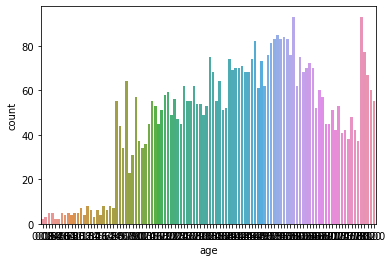

In [5]:
import seaborn as sns
sns.countplot(stroke_data["age"], label="Count")
plt.show()

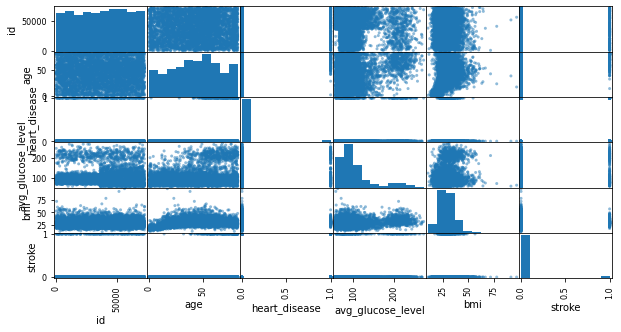

In [6]:
# the data is pretty balanced except mandarin 
from pandas.plotting import scatter_matrix 

scatter_matrix(stroke_data.drop('hypertension', axis=1), figsize=(10,5))
plt.show()

In [8]:
feature_names = ["age", 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = stroke_data[feature_names]
y = stroke_data['stroke']
X

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,80.0,0,1,105.92,32.5
2,49.0,0,0,171.23,34.4
3,79.0,1,0,174.12,24.0
4,81.0,0,0,186.21,29.0
...,...,...,...,...,...
4904,13.0,0,0,103.08,18.6
4905,81.0,0,0,125.20,40.0
4906,35.0,0,0,82.99,30.6
4907,51.0,0,0,166.29,25.6


# Create training and test sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Apply scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Models 

In [20]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

Accuracy of logistic regression on training 0.95653355066558
Accuracy of logistic regression on testing 0.9600977198697068


In [21]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

print('Accuracy of Decision tree on training', dt.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 1.0
Accuracy of Decision tree on testing 0.9087947882736156


In [22]:
# Setting max decision tree depth to help avoid overfitting
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt2.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt2.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.9573485465906004
Accuracy of Decision tree on testing 0.9568403908794788


In [23]:
# K-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print('Accuracy of Knn on training', knn.score(X_train_scaled, y_train))
print('Accuracy of Knn on testing', knn.score(X_test_scaled, y_test))

Accuracy of Knn on training 0.9570768812822602
Accuracy of Knn on testing 0.9576547231270358


In [24]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled,y_train)
print('Accuracy of Knn on training', lda.score(X_train_scaled, y_train))
print('Accuracy of Knn on testing', lda.score(X_test_scaled, y_test))

Accuracy of Knn on training 0.9489269220320565
Accuracy of Knn on testing 0.9495114006514658


In [11]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print('Accuracy of GNB on training', gnb.score(X_train_scaled, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test_scaled, y_test))

Accuracy of GNB on training 0.8791089377886444
Accuracy of GNB on testing 0.8778501628664495


In [26]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('Accuracy of SVM on training', svm.score(X_train_scaled, y_train))
print('Accuracy of SVM on testing', svm.score(X_test_scaled, y_test))

Accuracy of SVM on training 0.95653355066558
Accuracy of SVM on testing 0.9600977198697068


In [12]:
import pickle

In [17]:
pickle.dump(gnb, open('stroke_model.pkl','wb'))

In [ ]:
#pickle.dump(dt, open('dt.pkl','wb'))

In [19]:
# Loading model to compare the results
model = pickle.load( open('stroke_model.pkl','rb'))


In [20]:
new_data = [[80,1,1,200,45]]
df = pd.DataFrame(new_data,columns= ["age", 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'])
original_df = X.copy()
reference = original_df.append(df).reset_index()

new_data_frame = reference[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_data_frame)

In [21]:
pickle.dump(gnb, open('model.pkl','wb'))
model = pickle.load( open('model.pkl','rb'))
model.predict([list(scaled_df[len(scaled_df)-1])])

array([1], dtype=int64)